In [12]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [13]:
# Generate some random data for demonstration
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Feature
y = 2 * X[:, 0] + np.random.randn(100) * 2  # Target variable with noise




In [14]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [15]:
# Train Decision Tree Regression model
model = DecisionTreeRegressor(max_depth=3)
model.fit(X_train, y_train)



DecisionTreeRegressor(max_depth=3)

In [16]:
# Make predictions
y_pred = model.predict(X_test)



In [17]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



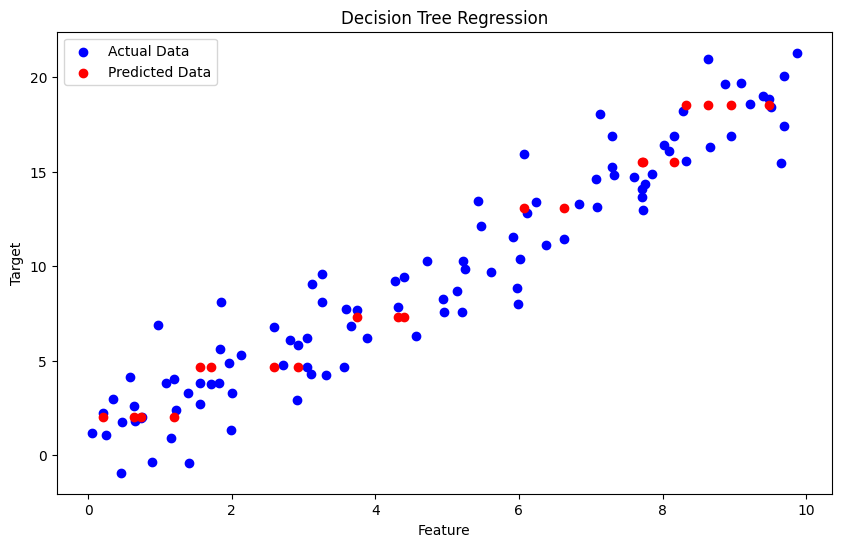

In [18]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, c='blue', label='Actual Data')
plt.scatter(X_test, y_pred, c='red', label='Predicted Data')
plt.title('Decision Tree Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()



In [19]:
# Visualize the Decision Tree (optional)
from sklearn.tree import export_text
tree_rules = export_text(model, feature_names=['Feature'])
print("Decision Tree Rules:\n", tree_rules)



Decision Tree Rules:
 |--- Feature <= 5.21
|   |--- Feature <= 3.11
|   |   |--- Feature <= 1.48
|   |   |   |--- value: [2.03]
|   |   |--- Feature >  1.48
|   |   |   |--- value: [4.65]
|   |--- Feature >  3.11
|   |   |--- Feature <= 3.28
|   |   |   |--- value: [8.91]
|   |   |--- Feature >  3.28
|   |   |   |--- value: [7.30]
|--- Feature >  5.21
|   |--- Feature <= 7.11
|   |   |--- Feature <= 6.06
|   |   |   |--- value: [10.47]
|   |   |--- Feature >  6.06
|   |   |   |--- value: [13.07]
|   |--- Feature >  7.11
|   |   |--- Feature <= 8.19
|   |   |   |--- value: [15.52]
|   |   |--- Feature >  8.19
|   |   |   |--- value: [18.55]



In [20]:
# Display evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 2.94
Mean Absolute Error (MAE): 1.46
R-squared (R2): 0.92


In [21]:

# Define a simple Decision Tree Node
class TreeNode:
    def __init__(self, feature_idx=None, split_value=None, left=None, right=None, value=None):
        self.feature_idx = feature_idx  # Index of feature to split on
        self.split_value = split_value  # Value to split the feature on
        self.left = left  # Left subtree
        self.right = right  # Right subtree
        self.value = value  # Value to predict (for leaf nodes)

# Decision Tree Regression Model
class DecisionTreeRegression:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y, depth=0):
        if depth == self.max_depth or np.unique(y).size == 1:
            return TreeNode(value=np.mean(y))

        m, n = X.shape
        min_mse = float('inf')
        best_feature_idx, best_split_value = None, None

        for feature_idx in range(n):
            unique_values = np.unique(X[:, feature_idx])
            for split_value in unique_values:
                left_mask = X[:, feature_idx] <= split_value
                right_mask = ~left_mask

                left_mse = np.mean((y[left_mask] - np.mean(y[left_mask]))**2)
                right_mse = np.mean((y[right_mask] - np.mean(y[right_mask]))**2)
                total_mse = left_mse + right_mse

                if total_mse < min_mse:
                    min_mse = total_mse
                    best_feature_idx = feature_idx
                    best_split_value = split_value

        if best_feature_idx is not None:
            left_mask = X[:, best_feature_idx] <= best_split_value
            right_mask = ~left_mask

            left_tree = self.fit(X[left_mask], y[left_mask], depth + 1)
            right_tree = self.fit(X[right_mask], y[right_mask], depth + 1)

            return TreeNode(feature_idx=best_feature_idx, split_value=best_split_value, left=left_tree, right=right_tree)
        else:
            return TreeNode(value=np.mean(y))

    def predict_one(self, node, x):
        if node.value is not None:
            return node.value
        elif x[node.feature_idx] <= node.split_value:
            return self.predict_one(node.left, x)
        else:
            return self.predict_one(node.right, x)

    def predict(self, X):
        return np.array([self.predict_one(self.tree, x) for x in X])




In [22]:
# Generate some random data for demonstration
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Feature
y = 2 * X[:, 0] + np.random.randn(100) * 2  # Target variable with noise



In [23]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = X[:80], X[80:], y[:80], y[80:]



In [24]:
# Train Decision Tree Regression model
model = DecisionTreeRegression(max_depth=3)
model.tree = model.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [25]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = np.mean((y_test - y_pred)**2)
mae = np.mean(np.abs(y_test - y_pred))
r2 = 1 - np.sum((y_test - y_pred)**2) / np.sum((y_test - np.mean(y_test))**2)



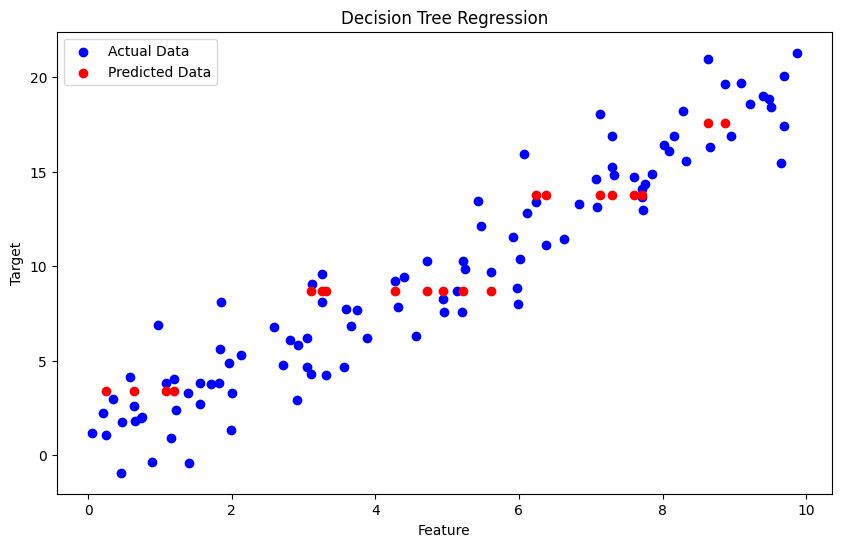

In [26]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, c='blue', label='Actual Data')
plt.scatter(X_test, y_pred, c='red', label='Predicted Data')
plt.title('Decision Tree Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()



In [27]:
# Display evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 5.25
Mean Absolute Error (MAE): 1.80
R-squared (R2): 0.84
